In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
#Data Loading
data = np.genfromtxt('sgd_data.txt',delimiter = ',')
x = np.zeros((40,1), dtype = np.float)
y = np.zeros((40,1), dtype = np.float)
for i in range(data.shape[0]):
    x[i] = data[i][0]
for i in range(data.shape[0]):
    y[i] = data[i][1]
print("Input data shape = {}".format(x.shape))
print("Output data shape = {}".format(y.shape))

Input data shape = (40, 1)
Output data shape = (40, 1)


In [3]:
#Helper Functions
def f(x,w,b):
    '''Sigmoid Function'''
    f = 1/(1+np.exp(-(w*x+b)))
    return f
def mse(x,y,w,b):
    '''Mean Squared Loss Function'''
    L = 0.0
    for i in range(x.shape[0]):
        L += 0.5*(y[i]-f(x[i],w,b))**2
    return L
def cross_entropy(x,y,w,b):
    '''Cross Entropy Loss Function'''
    L = 0.0
    for i in range(x.shape[0]):
        L += -(y[i]*np.log(f(x[i],w,b)))
    return L
def grad_w_mse(x,y,w,b):
    fx = f(x,w,b) 
    dw = (fx - y)*fx*(1-fx)*x
    return dw
def grad_b_mse(x,y,w,b):
    fx = f(x,w,b) 
    db = (fx - y)*fx*(1-fx)
    return db
def grad_w_cross(x,y,w,b):
    fx = f(x,w,b) 
    dw = (- y)*(1-fx)*x
    return dw
def grad_b_cross(x,y,w,b):
    fx = f(x,w,b) 
    db = (- y)*(1-fx)
    return db

In [11]:
#Gradient Discent
def Adam(x,y,epochs,batch_size,loss,lr):
    w = np.random.randn()
    b = np.random.randn()
    epsilon = 1e-8
    beta1 = 0.9
    beta2 = 0.999
    momentum_w,momentum_b = 0,0
    update_w, update_b = 0,0
    l_list = []
    w_list = []
    b_list = []
    points = 0
    ep = [i for i in range(epochs+1)]
    dw,db = 0,0
    for i in range(epochs+1):
        dw,db = 0,0
        for j in range(x.shape[0]):
            if (loss == 'mse'):
                dw += grad_w_mse(x[j],y[j],w,b)
                db += grad_b_mse(x[j],y[j],w,b)
            elif (loss == 'cross_entropy'):
                dw += grad_w_cross(x[j],y[j],w,b)
                db += grad_b_cross(x[j],y[j],w,b)
            points += 1
            if(points % batch_size == 0):
                #Momentum
                momentum_w = beta1 * momentum_w + (1 - beta1) * dw
                momentum_b = beta1 * momentum_b + (1 - beta1) * db
                #Update History
                update_w = beta2 * update_w + (1 - beta2) * dw**2
                update_b = beta2 * update_b + (1 - beta2) * db**2 
                #Bias Correction
                momentum_w = momentum_w /(1 - math.pow(beta1,i+1))  
                momentum_b = momentum_b /(1 - math.pow(beta1,i+1))
                update_w = update_w /(1 - math.pow(beta2,i+1))  
                update_b = update_b /(1 - math.pow(beta2,i+1))
                #Update of Parameters
                w = w - (lr/np.sqrt(update_w + epsilon))*momentum_w
                b = b - (lr/np.sqrt(update_b + epsilon))*momentum_b
                dw,db = 0,0
        if (loss == 'mse'):
            print('Loss after {}th epoch = {}\n'.format(i,mse(x,y,w,b)[0]))
            l_list.append(mse(x,y,w,b)[0])
        elif (loss == 'cross_entropy'):
            print('Loss after {}th epoch = {}\n'.format(i,cross_entropy(x,y,w,b)[0]))
            l_list.append(cross_entropy(x,y,w,b)[0])
        w_list.append(w[0])
        b_list.append(b[0])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss vs Epoch Curve\nAlgotithm :Mini Batch Adam\nBatch Size = {}\nInitial Learning Rate = {}\nLoss Function = {}'.format(batch_size,lr,loss))
    plt.plot(ep,l_list)
    plt.show()
    return w_list,b_list

Loss after 0th epoch = 4.715985761377007

Loss after 1th epoch = 4.712533672061665

Loss after 2th epoch = 4.712527913029016

Loss after 3th epoch = 4.71252790740431

Loss after 4th epoch = 4.712527907400399

Loss after 5th epoch = 4.712527907400397

Loss after 6th epoch = 4.712527907400397

Loss after 7th epoch = 4.712527907400397

Loss after 8th epoch = 4.712527907400397

Loss after 9th epoch = 4.712527907400397

Loss after 10th epoch = 4.712527907400397

Loss after 11th epoch = 4.712527907400397

Loss after 12th epoch = 4.712527907400397

Loss after 13th epoch = 4.712527907400397

Loss after 14th epoch = 4.712527907400397

Loss after 15th epoch = 4.712527907400397

Loss after 16th epoch = 4.712527907400397

Loss after 17th epoch = 4.712527907400397

Loss after 18th epoch = 4.712527907400397

Loss after 19th epoch = 4.712527907400397

Loss after 20th epoch = 4.712527907400397

Loss after 21th epoch = 4.712527907400397

Loss after 22th epoch = 4.712527907400397

Loss after 23th epoch 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: overflow encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: overflow encountered in true_divide


Loss after 26th epoch = 4.712527907400397

Loss after 27th epoch = 4.712527907400397

Loss after 28th epoch = 4.712527907400397

Loss after 29th epoch = 4.712527907400397

Loss after 30th epoch = 4.712527907400397

Loss after 31th epoch = 4.712527907400397

Loss after 32th epoch = 4.712527907400397

Loss after 33th epoch = 4.712527907400397

Loss after 34th epoch = 4.712527907400397

Loss after 35th epoch = 4.712527907400397

Loss after 36th epoch = 4.712527907400397

Loss after 37th epoch = 4.712527907400397

Loss after 38th epoch = 4.712527907400397

Loss after 39th epoch = 4.712527907400397

Loss after 40th epoch = 4.712527907400397

Loss after 41th epoch = 4.712527907400397

Loss after 42th epoch = 4.712527907400397

Loss after 43th epoch = 4.712527907400397

Loss after 44th epoch = 4.712527907400397

Loss after 45th epoch = 4.712527907400397

Loss after 46th epoch = 4.712527907400397

Loss after 47th epoch = 4.712527907400397

Loss after 48th epoch = 4.712527907400397

Loss after 

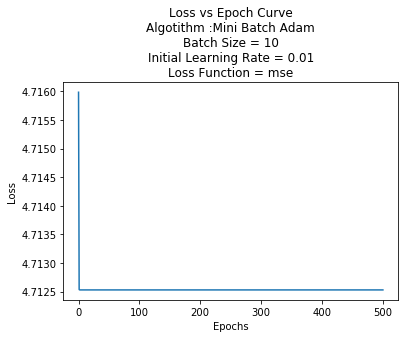

In [12]:
W,B = Adam(x,y,500,10,'mse',0.01)

In [8]:
print('Weight list = \n{}'.format(W))
print('\n\nBias list = \n{}'.format(B))

Weight list = 
[-2.1277241839307459, -2.1274897131784418, -2.1274893218511859, -2.1274893214689858, -2.1274893214687198, -2.1274893214687198, -2.1274893214687198, -2.1274893214687198, -2.1274893214687198, -2.1274893214687198, -2.1274893214687198, -2.1274893214687198, -2.1274893214687198, -2.1274893214687198, -2.1274893214687198, -2.1274893214687198, -2.1274893214687198, -2.1274893214687198, -2.1274893214687198, -2.1274893214687198, -2.1274893214687198, -2.1274893214687198, -2.1274893214687198, -2.1274893214687198, -2.1274893214687198, -2.1274893214687198, -2.1274893214687198, -2.1274893214687198, -2.1274893214687198, -2.1274893214687198, -2.1274893214687198, -2.1274893214687198, -2.1274893214687198, -2.1274893214687198, -2.1274893214687198, -2.1274893214687198, -2.1274893214687198, -2.1274893214687198, -2.1274893214687198, -2.1274893214687198, -2.1274893214687198, -2.1274893214687198, -2.1274893214687198, -2.1274893214687198, -2.1274893214687198, -2.1274893214687198, -2.127489321468719

Loss after 0th epoch = 3.7452850975621246

Loss after 1th epoch = 3.7450182611537044

Loss after 2th epoch = 3.745017815904401

Loss after 3th epoch = 3.745017815469536

Loss after 4th epoch = 3.7450178154692333

Loss after 5th epoch = 3.7450178154692333

Loss after 6th epoch = 3.7450178154692333

Loss after 7th epoch = 3.7450178154692333

Loss after 8th epoch = 3.7450178154692333

Loss after 9th epoch = 3.7450178154692333

Loss after 10th epoch = 3.7450178154692333

Loss after 11th epoch = 3.7450178154692333

Loss after 12th epoch = 3.7450178154692333

Loss after 13th epoch = 3.7450178154692333

Loss after 14th epoch = 3.7450178154692333

Loss after 15th epoch = 3.7450178154692333

Loss after 16th epoch = 3.7450178154692333

Loss after 17th epoch = 3.7450178154692333

Loss after 18th epoch = 3.7450178154692333



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: overflow encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: overflow encountered in true_divide


Loss after 19th epoch = 3.7450178154692333

Loss after 20th epoch = 3.7450178154692333

Loss after 21th epoch = 3.7450178154692333

Loss after 22th epoch = 3.7450178154692333

Loss after 23th epoch = 3.7450178154692333

Loss after 24th epoch = 3.7450178154692333

Loss after 25th epoch = 3.7450178154692333

Loss after 26th epoch = 3.7450178154692333

Loss after 27th epoch = 3.7450178154692333

Loss after 28th epoch = 3.7450178154692333

Loss after 29th epoch = 3.7450178154692333

Loss after 30th epoch = 3.7450178154692333

Loss after 31th epoch = 3.7450178154692333

Loss after 32th epoch = 3.7450178154692333

Loss after 33th epoch = 3.7450178154692333

Loss after 34th epoch = 3.7450178154692333

Loss after 35th epoch = 3.7450178154692333

Loss after 36th epoch = 3.7450178154692333

Loss after 37th epoch = 3.7450178154692333

Loss after 38th epoch = 3.7450178154692333

Loss after 39th epoch = 3.7450178154692333

Loss after 40th epoch = 3.7450178154692333

Loss after 41th epoch = 3.745017

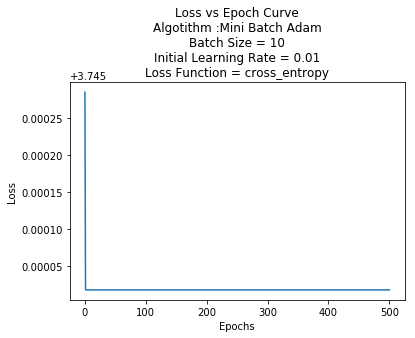

In [9]:
W,B = Adam(x,y,500,10,'cross_entropy',0.01)

In [10]:
print('Weight list = \n{}'.format(W))
print('\n\nBias list = \n{}'.format(B))

Weight list = 
[1.6106657452949942, 1.6108585056367024, 1.6108588273651616, 1.6108588276793863, 1.6108588276796048, 1.6108588276796048, 1.6108588276796048, 1.6108588276796048, 1.6108588276796048, 1.6108588276796048, 1.6108588276796048, 1.6108588276796048, 1.6108588276796048, 1.6108588276796048, 1.6108588276796048, 1.6108588276796048, 1.6108588276796048, 1.6108588276796048, 1.6108588276796048, 1.6108588276796048, 1.6108588276796048, 1.6108588276796048, 1.6108588276796048, 1.6108588276796048, 1.6108588276796048, 1.6108588276796048, 1.6108588276796048, 1.6108588276796048, 1.6108588276796048, 1.6108588276796048, 1.6108588276796048, 1.6108588276796048, 1.6108588276796048, 1.6108588276796048, 1.6108588276796048, 1.6108588276796048, 1.6108588276796048, 1.6108588276796048, 1.6108588276796048, 1.6108588276796048, 1.6108588276796048, 1.6108588276796048, 1.6108588276796048, 1.6108588276796048, 1.6108588276796048, 1.6108588276796048, 1.6108588276796048, 1.6108588276796048, 1.6108588276796048, 1.61

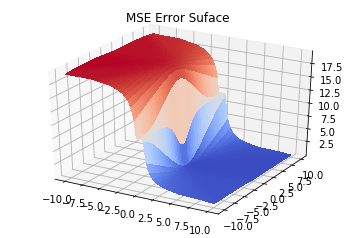

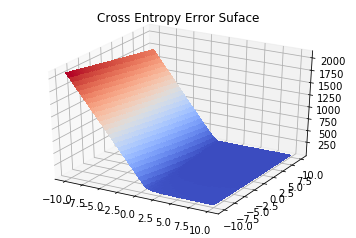

In [21]:
#Error Surface MSE
w = np.linspace(-10,10,num = 1000,dtype = np.float)
b = np.linspace(-10,10,num = 1000,dtype = np.float)
w,b = np.meshgrid(w,b)
mse_list = []
for i in range(w.shape[0]):
    Loss = mse(x,y,w[i],b[i])
    mse_list.append(Loss)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(w, b, mse_list, cmap=cm.coolwarm,linewidth=0, antialiased=False)
plt.title('MSE Error Suface')
plt.show()
#Error Surface Cross Entropy
cross_list = []
for i in range(w.shape[0]):
    Loss = cross_entropy(x,y,w[i],b[i])
    cross_list.append(Loss)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(w, b, cross_list, cmap=cm.coolwarm,linewidth=0, antialiased=False)
plt.title('Cross Entropy Error Suface')
plt.show()